In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the **transaction.csv** and **loyalty.csv** data

In [15]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/My Drive/transactions.csv")
df

,name,city,phone-number,email,id,TransactionID,Amount
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853,0,1372
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1,1779
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3,2,11
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,15abb55d-ec36-4b88-bba2-a58af8accd81,3,101
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,4,1318
...,...,...,...,...,...,...,...
9995,Mallory Wright,Adario,150-313-3588,Mallory.Wright@mail.com,5a61c980-9b07-4c76-9472-ffe48a0522c1,9995,456
9996,Sharon Mathis,Crystal Bay,833-594-1996,Mathis_Sharon61@mail.com,74696863-eef4-4a39-a1bb-927c83e6f6cb,9996,1924
9997,Lindsay Wiley,Gold Acres,839-373-6017,Lindsay_W@hotmail.com,6a870752-49f1-4e70-9a0f-f6d11fd8fbcb,9997,1164
9998,Jennifer Bennett,Severance,548-205-6380,Jennifer_B@gmail.com,c9bd3533-3906-45d8-8450-b67a2f7266dc,9998,652


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10000 non-null  object
 1   city           10000 non-null  object
 2   phone-number   10000 non-null  object
 3   email          10000 non-null  object
 4   id             10000 non-null  object
 5   TransactionID  10000 non-null  int64 
 6   Amount         10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

I look at which city make the order

In [18]:
df_temp = df[['id', 'TransactionID', 'city']].groupby(['id', 'TransactionID', 'city']).count()
df_temp = df_temp.reset_index(drop = False)
city = df_temp['city'].value_counts()
print('Number of cities: {}'.format(len(city)))

Number of cities: 7981


In [19]:
df_no_cities = df.groupby(['city'], as_index=False).count()
df_no_cities.head(30)

,city,name,phone-number,email,id,TransactionID,Amount
0,Abbeville,1,1,1,1,1,1
1,Abbott,2,2,2,2,2,2
2,Abbottsburg,1,1,1,1,1,1
3,Abbyville,1,1,1,1,1,1
4,Abell,1,1,1,1,1,1
5,Aberfoil,3,3,3,3,3,3
6,Abernathy,2,2,2,2,2,2
7,Abiquiu,1,1,1,1,1,1
8,Aboite,1,1,1,1,1,1
9,Abram,1,1,1,1,1,1


From here, we can see that with the total of 7981 different cities, they spent the total amount of $9,987,188.

In [20]:
pd.DataFrame([{'city': len(df['city'].value_counts()),    
               'transactions': len(df['TransactionID'].value_counts()),
               'customers': len(df['id'].value_counts()),  
               'total amount':sum(df['Amount'])
              }], columns = ['city', 'transactions', 'customers','total amount'])

,city,transactions,customers,total amount
0,7981,10000,10000,9987188


Now, I will determine the amount spent by in every city. 

In [31]:
df_cities_amt = df.groupby(by=['city'], as_index=False)['Amount'].sum()
df_cities_amt = df_cities_amt.rename(columns = {'Amount':'Total Amount'})
df_cities_amt.sort_values('Total Amount', ascending=False)

,city,Total Amount
5106,Oakhaven,6889
7323,Utuado,6294
2546,Gannvalley,5966
4927,Nickelsville,5796
5681,Poseyville,5547
...,...,...
6720,Spackenkill,2
3581,King Hill,2
7072,Thach,2
5439,Pembroke Pines,2


In [22]:
df_zero_amt = df.groupby(by=['city', 'name'], as_index=False)['Amount'].sum()
df_zero_amt.sort_values('Amount').head(30)

,city,name,Amount
9109,Twin Lakes,Tami Thompson,0
5367,Mathews,Jessica Walters,0
1285,Campanilla,Sydney Simpson,0
5435,McCaulley,Elizabeth Miles,0
8974,Tonganoxie,Ann Copeland,0
8137,Shippingport,Vincent Gould,1
2828,Fancy Farm,Holly Weber,1
7787,Saint Martinville,Elizabeth Thompson,1
8418,Spackenkill,Steven Ray,2
7475,Ridgeville,Nicole Moore,2


Drop the cities which has the total amount of USD0

In [23]:
df_cities_amt = df_cities_amt.loc[~(df_cities_amt==0).any(axis=1)]
print(f"The dimension is:{df_cities_amt.shape}")

The dimension is:(7976, 2)


List the cities for every range of the amount.

In [24]:
df_cities_category = df_cities_amt[df_cities_amt["Total Amount"] < 2000]

df_cities_category

,city,Total Amount
0,Abbeville,1524
2,Abbottsburg,1480
3,Abbyville,190
4,Abell,1952
6,Abernathy,1959
...,...,...
7975,Zinc,1011
7976,Zion,859
7977,Zita,1990
7978,Zolfo Springs,1505


Observation:


1.   There are 7016 cities spend the amount USD1~2000. 



count    7976.000000
mean     1252.154965
std       828.644756
min         1.000000
25%       617.000000
50%      1179.000000
75%      1735.000000
max      6889.000000
Name: Total Amount, dtype: float64


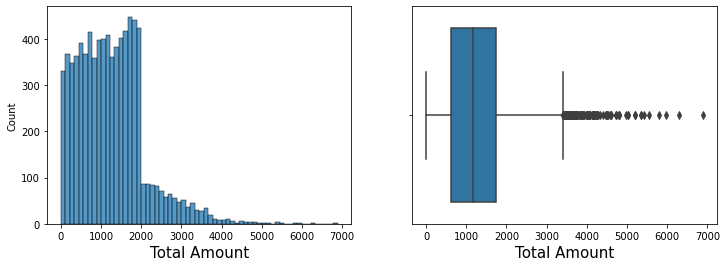

In [25]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = df_cities_amt, x = 'Total Amount', ax = axs[1])
sns.histplot(data = df_cities_amt, x = 'Total Amount', ax = axs[0])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(df_cities_amt['Total Amount'].describe())

Observations:


1.   More than 80% of the customers spending amount is between USD0 and USD2000. 
2.   And the number of customers gradually decrease between USD2001 to USD5000.
3. We can see that the maximum amount spend by the customer is USD6889. 



Now, we create the bar chart to show the distribution of the amount group.

In [26]:
amount_group = pd.cut(df_cities_amt['Total Amount'],
      bins = [df_cities_amt['Total Amount'].min(), 1000, 2000, 3000, 4000, 5000, 6000, 7000],
      labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000'])
df_cities_amt['Total Amount'] = amount_group

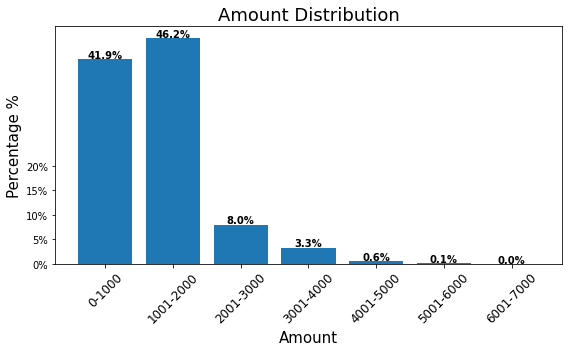

In [27]:
# Visualize the total amount by percentage
amount_percentage = (df_cities_amt.value_counts('Total Amount').sort_index() / df_cities_amt.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Amount', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Amount Distribution', fontsize = 18)

bar_plot = plt.bar(x = amount_percentage.index.values, height = amount_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(amount_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

In [28]:
df= df[df['Amount'] != 0]
df.sort_values('Amount')

,name,city,phone-number,email,id,TransactionID,Amount
7117,Elizabeth Thompson,Saint Martinville,768-810-7847,Elizabeth_Thompson@yandex.com,fc8bcc78-690c-4a2f-adf0-0d0bf73f4e1c,7117,1
5456,Holly Weber,Fancy Farm,792-090-2149,HollyWeber25@verizon.com,15b51ad7-8538-4a3b-8672-37023eca194a,5456,1
3891,Vincent Gould,Shippingport,529-672-2147,Vincent.Gould92@yahoo.com,aaddf6b7-2fee-416c-98bc-73309fff5aee,3891,1
3607,John Sampson,Pembroke Pines,748-776-0671,JohnSampson@verizon.com,1f7abc8f-9a9a-41b4-b47b-6e5736fab719,3607,2
6869,Steven Ray,Spackenkill,386-154-1424,Steven_Ray@verizon.com,29058e1c-da9d-4e22-a791-736e8c138cea,6869,2
...,...,...,...,...,...,...,...
2285,Kimberly Smith,Waumandee,574-488-0858,Kimberly.S26@zoho.com,ba135477-d447-497b-a17c-0c661002ed12,2285,2000
4801,Becky Estrada,Crandon Lakes,414-323-9676,Becky.E@aol.com,5da40623-1661-4c42-8319-22784a0ea344,4801,2000
6939,Lauren Caldwell,North Marshfield,623-441-2059,Lauren_Caldwell72@gmail.com,aa5103dd-7ee9-4db6-8c87-8b1441ad4b8b,6939,2000
6803,Bryan Fowler,Wheatley Heights,987-120-5433,Fowler.Bryan63@yandex.com,6ed81651-94bd-4f17-9dea-83a43226906c,6803,2000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           9995 non-null   object
 1   city           9995 non-null   object
 2   phone-number   9995 non-null   object
 3   email          9995 non-null   object
 4   id             9995 non-null   object
 5   TransactionID  9995 non-null   int64 
 6   Amount         9995 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 624.7+ KB


 K-Means Clustering

In [30]:
from pandas import DataFrame
df2 = DataFrame(df, columns = ['city','id','Amount'])
df2

,city,id,Amount
0,Pricedale,d37a5246-6ca3-4ade-9472-d7671becc853,1372
1,Rosebud,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1779
2,Llano,45c97ee7-a932-459e-b0de-dd8160b3efe3,11
3,Greenbank,15abb55d-ec36-4b88-bba2-a58af8accd81,101
4,S.N.P.J.,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,1318
...,...,...,...
9995,Adario,5a61c980-9b07-4c76-9472-ffe48a0522c1,456
9996,Crystal Bay,74696863-eef4-4a39-a1bb-927c83e6f6cb,1924
9997,Gold Acres,6a870752-49f1-4e70-9a0f-f6d11fd8fbcb,1164
9998,Severance,c9bd3533-3906-45d8-8450-b67a2f7266dc,652
